Откройте в pandas датасет `WorldCupMatches.csv`, выполните следующие задания:
    - (4 бала) составьте датасет Cups, который будет содержать следующую информацию
        - год проведения (индекс)
        - страну победителя
        - суммарная посещаемость (attendance)
        - сколько матчев всего было сыграно (используйте shape)
        - всего в вашем датасете должно получиться 18 строк
    - (2 бала) постройте график посещаемости в зависимости от года
    - (2 бала) постройте график посещаемости нормированный на количество матчей (за каждый год разделить посещаемость на количество матчей)
    - (* 2 бала) постройте pie chart того, сколько раз каждая страна становилась победителем (вам пригодится `X.winner.value_counts()` и `plt.pie()`)

P.S. можете обратиться за справкой к моему уроку с прошлой смены https://github.com/MrTsepa/SummerOlympSchool-MIPT-2018/blob/master/Main.ipynb

там то же что мы делали сегодня, но с пояснениями

Помните, что присваивание можно делать только если вы используете ровно один `loc`

например `Cups.loc[1930, 'winner'] = 'Germany'`

но не `Cups['winner'].loc[1930] = 'Germany'`

In [46]:
import numpy as np  # быстрые математические операции
import pandas as pd # для считывания данных
import matplotlib.pyplot as plt # для рисования графиков

In [47]:
X = pd.read_csv('WorldCupMatches.csv').dropna()
X = X[X['Year'] != 1950]
X = X[X['Year'] != 2014]

In [48]:
years = X.Year.unique()

In [49]:
X = pd.read_csv('WorldCupMatches.csv')
X.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [50]:
X[X.Year == 1962].head(4)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
136,1962.0,30 May 1962 - 15:00,Group 1,Carlos Dittborn,Arica,Uruguay,2.0,1.0,Colombia,,7908.0,0.0,1.0,DOROGI Andor (HUN),ETZEL FILHO Joao (BRA),GALBA Karol (TCH),231.0,1479.0,URU,COL
137,1962.0,30 May 1962 - 15:00,Group 3,Estadio Sausalito,Vina Del Mar,Brazil,2.0,0.0,Mexico,,10484.0,0.0,0.0,DIENST Gottfried (SUI),STEINER Carl (AUT),SCHWINTE Pierre (FRA),231.0,1461.0,BRA,MEX
138,1962.0,30 May 1962 - 15:00,Group 4,Estadio El Teniente-Codelco,Rancagua,Argentina,1.0,0.0,Bulgaria,,7134.0,1.0,0.0,GARDEAZABAL Juan (ESP),BUERGO Fernando (MEX),MORGAN Raymond (CAN),231.0,1447.0,ARG,BUL
139,1962.0,30 May 1962 - 15:00,Group 2,Nacional,Santiago De Chile,Chile,3.0,1.0,Switzerland,,65006.0,1.0,1.0,ASTON Ken (ENG),BLAVIER Arthur (BEL),YAMASAKI MALDONADO Arturo (MEX),231.0,1473.0,CHI,SUI


In [59]:
for idx in X.index:
    year = X.loc[idx, 'Year']
    if year != 1950.0 and year != 2014.0:
        if X.loc[idx, 'Stage'] == 'Final':
            if X.loc[idx, 'Home Team Goals'] > X.loc[idx, 'Away Team Goals']:
                Cups.loc[year, 'winner'] = X.loc[idx, 'Home Team Name']
            else:
                Cups.loc[year, 'winner'] = X.loc[idx, 'Away Team Name']

In [37]:
#старый способ

atn = 0
for idx in X.index:
    year = X.loc[idx, 'Year']
    if year != 1950.0 and year != 2014.0:
        if not pd.isnull(X.loc[idx, 'Attendance']):
            atn += int(X.loc[idx, 'Attendance'])
            if X.loc[idx, 'Stage'] == 'Final':
                Cups.loc[year, 'attendance'] = atn
                atn = 0

In [61]:
#новый способ

atn = 0
for year in years:
    for game in X[X.Year == year]:
        atn = sum(X[X.Year == year]['Attendance'])
        Cups.loc[year, 'attendance'] = int(atn)
        atn = 0

In [38]:
#без shape
match = 0
for idx in X.index:
    year = X.loc[idx, 'Year']
    if year != 1950.0 and year != 2014.0:
        match += 1
        if X.loc[idx, 'Stage'] == 'Final':
            Cups.loc[year, 'match_count'] = match
            match = 0

In [63]:
#с shape

for year in years:
    match = X[X['Year'] == year].shape[0]
    Cups.loc[year, 'match_count'] = match

In [56]:
Cups = pd.DataFrame(columns=['winner', 'attendance', 'match_count'], index=years)

In [64]:
Cups

,winner,attendance,match_count
1930.0,Uruguay,590549,18
1934.0,Italy,363000,17
1938.0,Italy,375700,18
1954.0,Germany FR,768607,26
1958.0,Brazil,819810,35
1962.0,Brazil,893172,32
1966.0,England,1563135,32
1970.0,Brazil,1603975,32
1974.0,Germany FR,1865753,38
1978.0,Argentina,1545791,38


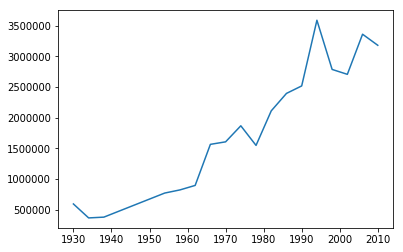

In [65]:
xs = years
ys = Cups.attendance

plt.plot(xs, ys)
plt.show()

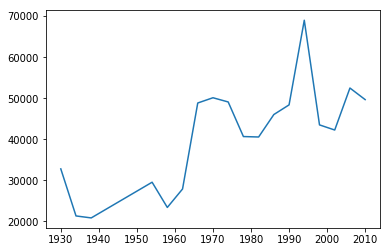

In [66]:
xs = years
ys = Cups.attendance/Cups.match_count

plt.plot(xs, ys)
plt.show()

(* 2 бала) постройте pie chart того, сколько раз каждая страна становилась победителем (вам пригодится `X.winner.value_counts()` и `plt.pie()`)

([<matplotlib.patches.Wedge at 0x92c4198>,
 [Text(0.842649,0.707066,'Italy'),
  Text(-0.55,0.952628,'Brazil'),
  Text(-1.08329,-0.191013,'Germany FR'),
  Text(-0.55,-0.952628,'France'),
  Text(0.191013,-1.08329,'Argentina'),
  Text(0.707066,-0.842649,'England'),
  Text(0.952628,-0.55,'Spain'),
  Text(1.08329,-0.191013,'Uruguay')])

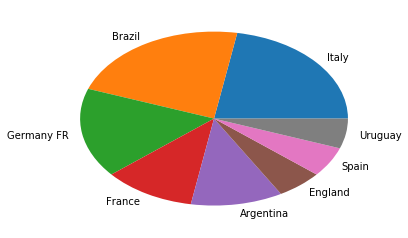

In [67]:
n = Cups.winner.value_counts()
plt.pie(n, labels = n.index)